## Python Workouts for Optimization

June, July 2022

In [1]:
import pandas as pd
import numpy as np

### List and Dictionary Comprehensions

In [2]:
vector = [i for i in range(10)]
vector

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
subvector = [i for i in range(10) if i%2 == 0]
subvector

[0, 2, 4, 6, 8]

In [4]:
ll = [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
matrix = np.array(ll)
matrix

array([[1, 3],
       [1, 4],
       [2, 3],
       [2, 1],
       [2, 4],
       [3, 1],
       [3, 4]])

In [5]:
dict1 = dict([(i, i+10) for i in range(4)])
dict1

{0: 10, 1: 11, 2: 12, 3: 13}

In [6]:
dict2 = {i : i+10 for i in range(10) if i > 5}
dict2

{6: 16, 7: 17, 8: 18, 9: 19}

In [7]:
dict3 = {(k, v): k+v for k in range(2) for v in range(2)}
dict3

{(0, 0): 0, (0, 1): 1, (1, 0): 1, (1, 1): 2}

### Generators

Perform function of iterators without the overhead

- When a generator function is called, it does not execute immediately but returns a generator object.

- The code will not execute until next() is called on the generator object.

- Once yield is invoked, control is temporarily passed back to the caller and the function is paused.

- Local variables and their execution state are stored between calls.

- StopIteration is raised automatically when the function is complete.

In [8]:
g = (x**2 for x in range(10))
g

<generator object <genexpr> at 0x0000022FE72C4740>

In [9]:
for i in g:
    print(i)

0
1
4
9
16
25
36
49
64
81


In [10]:
def fib(limit):
    a, b = 0, 1
    while a < limit:
        yield a
        a, b = b, a + b

x = fib(5)
x.__next__()

0

In [11]:
x.__next__()

1

In [12]:
x.__next__()

1

In [13]:
x.__next__()

2

In [14]:
fib_list = [i for i in fib(48)]
fib_list

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Recursion

In [15]:
def fib2(n):
    if n <= 1:
        return n
    else:
        return(fib2(n-1) + fib2(n-2))
 


In [16]:
fib2(12)

144

In [17]:
fib2(23)

28657

In [18]:
fib2(41)

165580141

### Lambda

In [19]:
x = lambda a, b: a**b
x(2,23)

8388608

lambda as a function creator

In [20]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


### Regular Expressions

search (span, string and group), findall, split, sub

In [21]:
import re

string = "The quick brown fox jumps o'er the lazy doggo."

# matches 'over' - not present
print(re.search("over", string))

# matches 'doggo' plus any character (.)
print(re.search("doggo.", string))


None
<re.Match object; span=(40, 46), match='doggo.'>


In [22]:
vowels = re.findall("[aeiouy]", string)

print(vowels)
print("There are", len(vowels), "vowels in the string.")

['e', 'u', 'i', 'o', 'o', 'u', 'o', 'e', 'e', 'a', 'y', 'o', 'o']
There are 13 vowels in the string.


In [23]:
locs = re.search("\s", string)

locs.group()

' '

In [24]:
locs.string

"The quick brown fox jumps o'er the lazy doggo."

In [25]:
locs.span()

(3, 4)

In [26]:
# Show locations of all the white spaces in the string

for match in re.finditer("\s", string):
    print('Match "{}" found at: [{},{}]'.format(match.group(), match.start(), match.end()))

Match " " found at: [3,4]
Match " " found at: [9,10]
Match " " found at: [15,16]
Match " " found at: [19,20]
Match " " found at: [25,26]
Match " " found at: [30,31]
Match " " found at: [34,35]
Match " " found at: [39,40]


In [27]:
re.split("\s", string)

['The', 'quick', 'brown', 'fox', 'jumps', "o'er", 'the', 'lazy', 'doggo.']

In [28]:
re.sub("o", "0", string)

"The quick br0wn f0x jumps 0'er the lazy d0gg0."

In [29]:
# just the first two
re.sub("o", "0", string, 2)

"The quick br0wn f0x jumps o'er the lazy doggo."

### A little on itertools

Below code from https://docs.python.org/3/library/itertools.html#itertools-recipes

In [30]:
import itertools as i
import collections

In [41]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(i.islice(iterable, n))

def prepend(value, iterator):
    "Prepend a single value in front of an iterator"
    # prepend(1, [2, 3, 4]) -> 1 2 3 4
    return i.chain([value], iterator)

def tail(n, iterable):
    "Return an iterator over the last n items"
    # tail(3, 'ABCDEFG') --> E F G
    return iter(collections.deque(iterable, maxlen=n))

def nth(iterable, n, default=None):
    "Returns the nth item or a default value"
    return next(i.islice(iterable, n, None), default)

In [42]:
objects = ["person", "entity", "event", "relationship"]
take(3, objects)

['person', 'entity', 'event']

In [43]:
tail(2, objects)

In [44]:
nth(objects, 1)

'entity'

### Enumerate

In [45]:
list(enumerate(objects))

[(0, 'person'), (1, 'entity'), (2, 'event'), (3, 'relationship')]

In [46]:
list(enumerate(re.split("\s", string)))

[(0, 'The'),
 (1, 'quick'),
 (2, 'brown'),
 (3, 'fox'),
 (4, 'jumps'),
 (5, "o'er"),
 (6, 'the'),
 (7, 'lazy'),
 (8, 'doggo.')]

In [47]:
floats = [1.3, 2.6, 4.6, 2.2, 9.8]
list(map(round, floats))

[1, 3, 5, 2, 10]

In [48]:
words = re.split("\s", string)
words

['The', 'quick', 'brown', 'fox', 'jumps', "o'er", 'the', 'lazy', 'doggo.']

### Using map with a lambda function

In [49]:
# append the word "wow" in between each word
new_list = list(map(lambda w: w + " wow ", words))

# join new_list into a string, get rid of the period after 'doggo'
s = re.sub("\.", "", str([''.join(new_list)][0]).strip())

print(s)

The wow quick wow brown wow fox wow jumps wow o'er wow the wow lazy wow doggo wow


### Using * to unpack a list

In [50]:
# Create a new list of odd numbers from 1 to 11 by unpacking a range object
nums_list2 = [*list(range(1,12,2))]
print(nums_list2)

[1, 3, 5, 7, 9, 11]


### Using enumerate

In [51]:
# More 'enumerate' practice

names = ['Jerry', 'Kramer', 'Elaine', 'George', 'Newman']

# Rewrite the for loop to use enumerate
indexed_names = []
for i,name in enumerate(names):
    index_name = (i,name)
    indexed_names.append(index_name) 
print(indexed_names)

# Rewrite the above for loop using list comprehension
indexed_names_comp = [(i,name) for i,name in enumerate(names)]
print(indexed_names_comp)

# Unpack an enumerate object with a starting index of one
indexed_names_unpack = [*enumerate(names, 1)]
print(indexed_names_unpack)

[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(1, 'Jerry'), (2, 'Kramer'), (3, 'Elaine'), (4, 'George'), (5, 'Newman')]


### Using map 

to apply upper() to each element in names

In [52]:
# Use map to apply str.upper to each element in names
names_map  = map(str.upper, names)

# Print the type of the names_map
print(type(names_map))

# Unpack names_map into a list
names_uppercase = [*names_map]

# Print the list created above
print(names_uppercase)

<class 'map'>
['JERRY', 'KRAMER', 'ELAINE', 'GEORGE', 'NEWMAN']


### Numpy arrays

Efficient because they allow broadcasting, like R!

In [53]:
a = np.array([2, 9, 22])
a2 = a ** 2

np.set_printoptions(precision=1)
print(a)
print(a2)

[ 2  9 22]
[  4  81 484]


Two-dimensional numpy arrays

In [54]:
two_d = [
    [1,2,3],
    [4,5,6]
]
nptd = np.array(two_d)
nptd

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
nptd[:,0]

array([1, 4])

In [56]:
nptd[0,:]

array([1, 2, 3])

In [57]:
nptd[0,1]

2

### Boolean indexing of numpy arrays

In [58]:
nptd[0,:] > 1

array([False,  True,  True])

In [59]:
nptd[0,:][nptd[0,:] > 1]

array([2, 3])

In [60]:
nptd[nptd>2]

array([3, 4, 5, 6])

In [61]:
# Double every element
dbls = nptd * 2
print(dbls)


[[ 2  4  6]
 [ 8 10 12]]


In [62]:
# Replace the third column 
dbls[:,2] = dbls[:,2] ** 2
print(dbls)

[[  2   4  36]
 [  8  10 144]]


### Welcoming guests to Festivus with map and *

In [63]:
def welcome_guest(l):
    return "Welcome " + l[0] + "! You're " + str(l[1]) + " minutes late!"


In [64]:
# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

# Use list comprehension and enumerate to pair guests to new times
guest_arrivals = [(names[i],time) for i,time in enumerate(new_times)]

# Map the welcome_guest function to each (guest,time) pair
welcome_map = map(welcome_guest, guest_arrivals)

guest_welcomes = [*welcome_map]
print(*guest_welcomes, sep='\n')

Welcome Jerry! You're 7 minutes late!
Welcome Kramer! You're 17 minutes late!
Welcome Elaine! You're 27 minutes late!
Welcome George! You're 37 minutes late!
Welcome Newman! You're 47 minutes late!


### Using %timeit and %%timeit

Unpacking the range object is faster than using list comprehension

In [65]:
r_time = %timeit -o [i for i in range(51)]
u_time = %timeit -o [*list(range(51))]
r_time.average - u_time.average 

1.9 µs ± 35.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
700 ns ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


1.1969195857142795e-06

In [66]:
import timeit

t = timeit.Timer('char in text', setup='text = "sample string"; char = "g"')
t.timeit()


0.05230530000000044

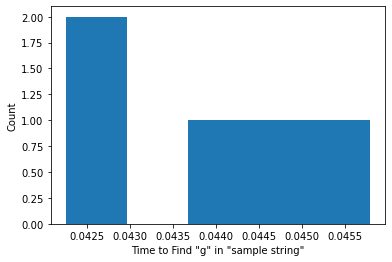

In [67]:
%matplotlib inline

import matplotlib.pyplot as plt

ts = t.repeat()
plt.hist(ts, bins=len(ts))
plt.xlabel('Time to Find "g" in "sample string"')
plt.ylabel('Count')
plt.show()

Using %%timeit for cell execution timings

In [70]:
heroes = pd.read_csv("Datasets/heroes_information.csv")
heroes = heroes.drop(columns=["Unnamed: 0"], errors="ignore")
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [71]:
heroes.shape

(734, 10)

In [73]:
wts = list(heroes["Weight"])

In [74]:
%%timeit
hero_wts_lbs = []
for wt in wts:
    hero_wts_lbs.append(wt * 2.20462)

67.8 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
wts_np = np.array(heroes["Weight"])

In [76]:
%%timeit
hero_wts_lbs_np = wts_np * 2.20462

1.21 µs ± 5.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Code Profiling

In [78]:
import line_profiler

In [84]:
hero_names = list(heroes.head(10)["name"])
hero_heights = np.array(heroes.head(10)["Height"])
hero_weights = np.array(heroes.head(10)["Weight"])

In [85]:
def convert_units(heroes, heights, weights):
    new_hts = [ht * 0.39370 for ht in heights]
    new_wts = [wt * 2.20462 for wt in weights]
    
    hero_data = {}
    for i, hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])
        
    return hero_data


In [86]:
convert_units(hero_names, hero_heights, hero_weights)

{'A-Bomb': (79.9211, 972.2374199999999),
 'Abe Sapien': (75.19669999999999, 143.3003),
 'Abin Sur': (72.8345, 198.4158),
 'Abomination': (79.9211, 972.2374199999999),
 'Abraxas': (-38.9763, -218.25737999999998),
 'Absorbing Man': (75.9841, 268.96364),
 'Adam Monroe': (-38.9763, -218.25737999999998),
 'Adam Strange': (72.8345, 194.00655999999998),
 'Agent 13': (68.1101, 134.48182),
 'Agent Bob': (70.0786, 178.57422)}

In [87]:
%load_ext line_profiler

In [88]:
%lprun -f convert_units convert_units(hero_names, hero_heights, hero_weights)

In [97]:
# Redefine function to use array broadcasting

def convert_units_broadcast(heroes, heights, weights):
    new_hts = heights * 0.39370
    new_wts = weights * 2.20462 
    
    hero_data = {}
    for i, hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])
        
    return hero_data

In [98]:
%lprun -f convert_units_broadcast convert_units_broadcast(hero_names, hero_heights, hero_weights)

### Memory Consumption Profiling

In [99]:
import memory_profiler

In [102]:
%reload_ext memory_profiler

In [104]:
from herofuncs import convert_units_broadcast

In [105]:
%mprun -f convert_units_broadcast convert_units_broadcast(hero_names, hero_heights, hero_weights)

In [110]:
import random

h_indexes = list(heroes.index)
hero_sample = random.choices(h_indexes, k=25000)
heights_sample = [heroes.at[i, "Height"] for i in hero_sample]
weights_sample = [heroes.at[i, "Weight"] for i in hero_sample]

In [113]:
%reload_ext memory_profiler

In [117]:
from bmifuncs import calc_bmi_lists

In [118]:
%mprun -f calc_bmi_lists calc_bmi_lists(hero_sample, heights_sample, weights_sample)

In [119]:
%reload_ext memory_profiler

In [120]:
from bmifuncs2 import calc_bmi_arrays

In [122]:
hero_sample2 = np.array(hero_sample)
heights_sample2 = np.array(heights_sample)
weights_sample2 = np.array(weights_sample)

In [124]:
%mprun -f calc_bmi_arrays calc_bmi_arrays(hero_sample2, heights_sample2, weights_sample2)

### Combining, Counting and Iterating

In [125]:
pokemon = pd.read_csv("Datasets/pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [126]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [129]:
pokemon = pokemon.sort_values(["name"]).reset_index()
pokemon.head()

,index,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,459,"['Snow Warning', 'Soundproof']",2.00,1.0,1.0,0.5,1.0,2.0,4.0,2.0,...,50.0,460,132,105,30,grass,ice,135.5,4,0
1,62,"['Synchronize', 'Inner Focus', 'Magic Guard']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,75.4,63,105,55,90,psychic,NaN,19.5,1,0
2,358,"['Pressure', 'Super Luck', 'Justified']",2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,...,50.0,359,115,60,115,dark,NaN,47.0,3,0
3,616,"['Hydration', 'Sticky Hold', 'Unburden']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,...,50.0,617,100,60,145,bug,NaN,25.3,5,0
4,680,['Stance Change'],0.25,2.0,0.5,1.0,0.5,0.0,2.0,0.5,...,50.0,681,150,50,60,steel,ghost,53.0,6,0


In [130]:
pokemon = pokemon.drop(columns=["index"], errors="ignore")

In [131]:
p_hps = zip(list(pokemon["name"]), list(pokemon["hp"]))
p_hps

In [133]:
unpacked_phps = [*p_hps]
print(unpacked_phps)

[('Abomasnow', 90), ('Abra', 25), ('Absol', 65), ('Accelgor', 80), ('Aegislash', 60), ('Aerodactyl', 80), ('Aggron', 70), ('Aipom', 55), ('Alakazam', 55), ('Alomomola', 165), ('Altaria', 75), ('Amaura', 77), ('Ambipom', 75), ('Amoonguss', 114), ('Ampharos', 90), ('Anorith', 45), ('Araquanid', 68), ('Arbok', 60), ('Arcanine', 90), ('Arceus', 120), ('Archen', 55), ('Archeops', 75), ('Ariados', 70), ('Armaldo', 75), ('Aromatisse', 101), ('Aron', 50), ('Articuno', 90), ('Audino', 103), ('Aurorus', 123), ('Avalugg', 95), ('Axew', 46), ('Azelf', 75), ('Azumarill', 100), ('Azurill', 50), ('Bagon', 45), ('Baltoy', 40), ('Banette', 64), ('Barbaracle', 72), ('Barboach', 50), ('Basculin', 70), ('Bastiodon', 60), ('Bayleef', 60), ('Beartic', 95), ('Beautifly', 60), ('Beedrill', 65), ('Beheeyem', 75), ('Beldum', 40), ('Bellossom', 75), ('Bellsprout', 50), ('Bergmite', 55), ('Bewear', 120), ('Bibarel', 79), ('Bidoof', 59), ('Binacle', 42), ('Bisharp', 65), ('Blastoise', 79), ('Blaziken', 80), ('Blis

In [134]:
max(list(pokemon["hp"]))

255

In [135]:
pokemon[pokemon["hp"]==255]["name"]

57    Blissey
Name: name, dtype: object

In [137]:
poke_types = list(pokemon["type1"])


In [138]:
from collections import Counter

type_counts = Counter(poke_types)

print(type_counts)

Counter({'water': 114, 'normal': 105, 'grass': 78, 'bug': 72, 'psychic': 53, 'fire': 52, 'rock': 45, 'electric': 39, 'poison': 32, 'ground': 32, 'dark': 29, 'fighting': 28, 'dragon': 27, 'ghost': 27, 'steel': 24, 'ice': 23, 'fairy': 18, 'flying': 3})


### Combinatoric Generators

In [141]:
# Take the top 5 types
poke_sm = list(type_counts.keys())[0:5]

In [142]:
from itertools import combinations

combos_obj = combinations(poke_sm, 2)

combos = [*combos_obj]

print(combos)

[('grass', 'psychic'), ('grass', 'dark'), ('grass', 'bug'), ('grass', 'steel'), ('psychic', 'dark'), ('psychic', 'bug'), ('psychic', 'steel'), ('dark', 'bug'), ('dark', 'steel'), ('bug', 'steel')]


In [143]:
# zip names and types
names = list(pokemon["name"])
names_types = [*zip(names, poke_types)]

print(*names_types[:15], sep='\n')

('Abomasnow', 'grass')
('Abra', 'psychic')
('Absol', 'dark')
('Accelgor', 'bug')
('Aegislash', 'steel')
('Aerodactyl', 'rock')
('Aggron', 'steel')
('Aipom', 'normal')
('Alakazam', 'psychic')
('Alomomola', 'water')
('Altaria', 'dragon')
('Amaura', 'rock')
('Ambipom', 'normal')
('Amoonguss', 'grass')
('Ampharos', 'electric')


In [144]:
poke_types2 = list(pokemon["type2"])

# Combine all three lists together
names_types2 = [*zip(names, poke_types, poke_types2)]

print(*names_types2[:15], sep='\n')

('Abomasnow', 'grass', 'ice')
('Abra', 'psychic', nan)
('Absol', 'dark', nan)
('Accelgor', 'bug', nan)
('Aegislash', 'steel', 'ghost')
('Aerodactyl', 'rock', 'flying')
('Aggron', 'steel', 'rock')
('Aipom', 'normal', nan)
('Alakazam', 'psychic', nan)
('Alomomola', 'water', nan)
('Altaria', 'dragon', 'flying')
('Amaura', 'rock', 'ice')
('Ambipom', 'normal', nan)
('Amoonguss', 'grass', 'poison')
('Ampharos', 'electric', nan)


### Set Theory

In [150]:
# draw 50 pokemon for each pokedex
p_indexes = list(pokemon.index)
ash_pokes = random.choices(p_indexes, k=50)
misty_pokes = random.choices(p_indexes, k=50)

ash_pokedex = [pokemon.at[i, "name"] for i in ash_pokes]
misty_pokedex = [pokemon.at[i, "name"] for i in misty_pokes]

# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
print("These Pokemon exist in BOTH pokedex:")
both = ash_set.intersection(misty_set)
print(both)
print("\n\n")

# Find the Pokémon that Ash has and Misty does not have
print("Pokemon Ash has that Misty DOES NOT have:")
ash_only = ash_set.difference(misty_set)
print(ash_only)
print("\n\n")

# Find the Pokémon that are in only one set (not both)
print("Pokemon that either Ash or Misty have, but not both:")
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)
print("\n\n")


These Pokemon exist in BOTH pokedex:
{'Altaria', 'Totodile'}



Pokemon Ash has that Misty DOES NOT have:
{'Smeargle', 'Shellos', 'Buneary', 'Minccino', 'Wormadam', 'Poliwhirl', 'Basculin', 'Zigzagoon', 'Electrode', 'Raticate', 'Flygon', 'Scizor', 'Dragalge', 'Kricketune', 'Heatran', 'Tentacruel', 'Scolipede', 'Raichu', 'Cloyster', 'Zapdos', 'Grubbin', 'Azumarill', 'Forretress', 'Axew', 'Pumpkaboo', 'Geodude', 'Victreebel', 'Charmander', 'Vulpix', 'Honedge', 'Mamoswine', 'Ponyta', 'Chimecho', 'Probopass', 'Litwick', 'Espeon', 'Alomomola', 'Bergmite', 'Samurott', 'Pidove', 'Necrozma', 'Solrock', 'Linoone', 'Gliscor', 'Hydreigon', 'Tyrantrum', 'Misdreavus'}



Pokemon that either Ash or Misty have, but not both:
{'Cofagrigus', 'Basculin', 'Rowlet', 'Regigigas', 'Weavile', 'Raticate', 'Electrode', 'Scizor', 'Panpour', 'Larvitar', 'Cloyster', 'Azumarill', 'Axew', 'Mamoswine', 'Venipede', 'Miltank', 'Bergmite', 'Vibrava', 'Samurott', 'Hydreigon', 'Wormadam', 'Gyarados', 'Smeargle', 'Xurkitr

In [151]:
# Check if Psyduck is in either pokedex

print('Psyduck' in ash_set)
print('Psyduck' in misty_set)

False
False


In [153]:
# Check if Zigzagoon is in either pokedex

print('Zigzagoon' in ash_set)
print('Zigzagoon' in misty_set)

True
False


### Eliminating Loops

"Flat is better than nested."

In [154]:
# Pokemon stats: HP, attack, defense, speed
poke_stats = [
    list(pokemon["hp"]),
    list(pokemon["attack"]),
    list(pokemon["defense"]),
    list(pokemon["speed"])
]

In [155]:
totals_map = [*map(sum, poke_stats)]
totals_map

[55236, 62364, 58480, 53134]

NOTE: This didn't work as expected, because I really wanted row-wise sums

Numpy to the rescue!

In [156]:
stats_np = np.array([
    list(pokemon["hp"]),
    list(pokemon["attack"]),
    list(pokemon["defense"]),
    list(pokemon["speed"])
])

In [161]:
avg_poke_scores = stats_np.mean(axis=0)
avg_poke_scores[:15]

array([ 89.2,  37.5,  97.5,  83.8,  80. , 112.5, 122.5,  66.2,  80. ,
        96.2,  93.8,  58. ,  89. ,  74.8,  83.8])

In [162]:
total_poke_scores = stats_np.sum(axis=0)
total_poke_scores[:15]

array([357, 150, 390, 335, 320, 450, 490, 265, 320, 385, 375, 232, 356,
       299, 335])

In [163]:
max(total_poke_scores)

530

In [164]:
pokemon[pokemon["hp"]+pokemon["attack"]+pokemon["defense"]+pokemon["speed"]==530]["name"]

276    Groudon
Name: name, dtype: object

In [165]:
# Listing names and name lengths for generations 1 and 2
poke_names = list(pokemon["name"])
poke_gens = list(pokemon["generation"])

[(name, len(name)) for name,gen in zip(poke_names, poke_gens) if gen < 3]

[('Abra', 4),
 ('Aerodactyl', 10),
 ('Aipom', 5),
 ('Alakazam', 8),
 ('Ampharos', 8),
 ('Arbok', 5),
 ('Arcanine', 8),
 ('Ariados', 7),
 ('Articuno', 8),
 ('Azumarill', 9),
 ('Bayleef', 7),
 ('Beedrill', 8),
 ('Bellossom', 9),
 ('Bellsprout', 10),
 ('Blastoise', 9),
 ('Blissey', 7),
 ('Bulbasaur', 9),
 ('Butterfree', 10),
 ('Caterpie', 8),
 ('Celebi', 6),
 ('Chansey', 7),
 ('Charizard', 9),
 ('Charmander', 10),
 ('Charmeleon', 10),
 ('Chikorita', 9),
 ('Chinchou', 8),
 ('Clefable', 8),
 ('Clefairy', 8),
 ('Cleffa', 6),
 ('Cloyster', 8),
 ('Corsola', 7),
 ('Crobat', 6),
 ('Croconaw', 8),
 ('Cubone', 6),
 ('Cyndaquil', 9),
 ('Delibird', 8),
 ('Dewgong', 7),
 ('Diglett', 7),
 ('Ditto', 5),
 ('Dodrio', 6),
 ('Doduo', 5),
 ('Donphan', 7),
 ('Dragonair', 9),
 ('Dragonite', 9),
 ('Dratini', 7),
 ('Drowzee', 7),
 ('Dugtrio', 7),
 ('Dunsparce', 9),
 ('Eevee', 5),
 ('Ekans', 5),
 ('Electabuzz', 10),
 ('Electrode', 9),
 ('Elekid', 6),
 ('Entei', 5),
 ('Espeon', 6),
 ('Exeggcute', 9),
 ('Exeggutor

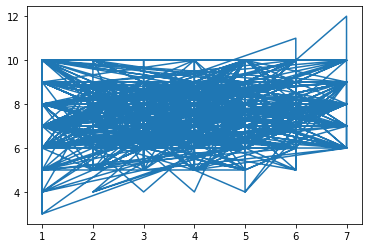

In [168]:
name_lengths = [*map(len, list(pokemon["name"]))]
plt.plot(poke_gens, name_lengths)
plt.show()

It does appear that later-generation pokemon had some longer names.

Let's see if there is a significant difference in the average name-length.

In [172]:
pokemon["name_length"] = pokemon["name"].str.len()
shortpoke = pokemon[["name", "generation", "name_length"]].copy()
shortpoke.groupby("generation").mean("name_length")

,name_length
generation,
1,7.304636
2,7.280000
3,7.133333
4,7.467290
5,7.685897
6,7.597222
7,8.012500


In [174]:
import math

stats = shortpoke.groupby(['generation'])['name_length'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

print(stats)

                mean  count       std   ci95_hi   ci95_lo
generation                                               
1           7.304636    151  1.562022  7.553782  7.055489
2           7.280000    100  1.371278  7.548771  7.011229
3           7.133333    135  1.098167  7.318583  6.948084
4           7.467290    107  1.355059  7.724047  7.210533
5           7.685897    156  1.385662  7.903343  7.468452
6           7.597222     72  1.390711  7.918460  7.275984
7           8.012500     80  1.216904  8.279166  7.745834


In [177]:
# calculate variance ratios

stats["var"] = stats["std"]**2
for i in range(1,7):
    print("Ratio " + str(i) + " to " + str(i+1))
    print(stats.at[i, "var"]/stats.at[i+1, "var"])

Ratio 1 to 2
1.2975465098740098
Ratio 2 to 3
1.5592459245924606
Ratio 3 to 4
0.6567806315584276
Ratio 4 to 5
0.9563170440777119
Ratio 5 to 6
0.9927516921360239
Ratio 6 to 7
1.3060545605553875


In [183]:
# variance ratios are fine, proceed with t-test assuming equal variance

import scipy.stats as stats

for i in range(1,8):
    l1 = shortpoke[shortpoke["generation"]==i]["name_length"]
    for j in range(2,6):
        l2 = shortpoke[shortpoke["generation"]==j]["name_length"]
    
        # Perform the two sample t-test with equal variances
        res = stats.ttest_ind(a=l1, b=l2, equal_var=True)
        if res.pvalue < 0.05:
            print("T-Test: Generation " + str(i) + " vs. Generation " + str(j))
            print("We are 95% confident that there is a significant difference in means of " + str(res.statistic))


T-Test: Generation 1 vs. Generation 5
We are 95% confident that there is a significant difference in means of -2.2641378466310034
T-Test: Generation 2 vs. Generation 5
We are 95% confident that there is a significant difference in means of -2.295918547782711
T-Test: Generation 3 vs. Generation 4
We are 95% confident that there is a significant difference in means of -2.1177654427819723
T-Test: Generation 3 vs. Generation 5
We are 95% confident that there is a significant difference in means of -3.729143488708052
T-Test: Generation 4 vs. Generation 3
We are 95% confident that there is a significant difference in means of 2.1177654427819723
T-Test: Generation 5 vs. Generation 2
We are 95% confident that there is a significant difference in means of 2.295918547782711
T-Test: Generation 5 vs. Generation 3
We are 95% confident that there is a significant difference in means of 3.729143488708052
T-Test: Generation 6 vs. Generation 3
We are 95% confident that there is a significant difference

There is a significant difference in name lengths between many generations, with generations > 3 having longer names in general than generations < 3.

The largest significant average difference is between Generation 7 names and Generation 3 names, with Generation 7 names being an average of 5.45 characters longer than Generation 3 names.

In [187]:
# Create a total stats array
total_stats_np = stats_np.sum(axis=0)

# Create an average stats array
avg_stats_np = stats_np.mean(axis=0)

# Combine names, total_stats_np, and avg_stats_np into a list
poke_list_np = [*zip(poke_names, total_stats_np, avg_stats_np)]

top_3 = sorted(poke_list_np, key=lambda x: x[1], reverse=True)[:3]
print('3 strongest Pokémon:\n{}'.format(top_3))

3 strongest Pokémon:
[('Groudon', 530, 132.5), ('Zygarde', 522, 130.5), ('Slaking', 510, 127.5)]


### Improving Loop Efficiencies

In [188]:
# higher than average attack values

avg_attack = pokemon["attack"].mean()
pokemon[pokemon["attack"]>avg_attack]["name"]

0       Abomasnow
2           Absol
4       Aegislash
5      Aerodactyl
6          Aggron
          ...    
793     Zebstrika
794        Zekrom
796       Zoroark
799      Zweilous
800       Zygarde
Name: name, Length: 370, dtype: object

Out of 800 pokemon, 370 (46%) have an attack value > average. (Used pandas here, instead of a loop.)

Next, we're calculating %s of pokemon in each generation.

In [189]:
# Import Counter
from collections import Counter
generations = list(pokemon["generation"])

# Collect the count of each generation
gen_counts = Counter(generations)

# Improve for loop by moving one calculation above the loop
total_count = len(generations)

for gen,count in gen_counts.items():
    gen_percent = round(count / total_count * 100, 2)
    print('generation {}: count = {:3} percentage = {}'
          .format(gen, count, gen_percent))

generation 4: count = 107 percentage = 13.36
generation 1: count = 151 percentage = 18.85
generation 3: count = 135 percentage = 16.85
generation 5: count = 156 percentage = 19.48
generation 6: count =  72 percentage = 8.99
generation 2: count = 100 percentage = 12.48
generation 7: count =  80 percentage = 9.99


The largest generation is generation 5, but generation 1 is a close second.

Below, we're using combinations to get a list of all the poke-type pairs (for a small set of types), then using map to convert enumerated pairs tuples to lists.

In [191]:
# Collect pairs from the small list of poke types
possible_pairs = [*combinations(poke_sm, 2)]

# Create an empty list called enumerated_tuples
enumerated_tuples = []

# Append each enumerated_pair_tuple to the empty list above
for i,pair in enumerate(possible_pairs, 1):
    enumerated_pair_tuple = (i,) + pair
    enumerated_tuples.append(enumerated_pair_tuple)

# Convert all tuples in enumerated_tuples to a list
enumerated_pairs = [*map(list, enumerated_tuples)]
print(enumerated_pairs)

[[1, 'grass', 'psychic'], [2, 'grass', 'dark'], [3, 'grass', 'bug'], [4, 'grass', 'steel'], [5, 'psychic', 'dark'], [6, 'psychic', 'bug'], [7, 'psychic', 'steel'], [8, 'dark', 'bug'], [9, 'dark', 'steel'], [10, 'bug', 'steel']]


Calculate Z-Scores using numpy arrays

In [192]:
hps = np.array(pokemon["hp"])

# Calculate the total HP avg and total HP standard deviation
hp_avg = hps.mean()
hp_std = hps.std()

# Use NumPy to eliminate the previous for loop
z_scores = (hps - hp_avg)/hp_std

# Combine names, hps, and z_scores
poke_zscores2 = [*zip(poke_names, hps, z_scores)]
print(*poke_zscores2[:3], sep='\n')

('Abomasnow', 90, 0.7922310956895511)
('Abra', 25, -1.6551114934332969)
('Absol', 65, -0.14905451551154433)


In [193]:
# Use list comprehension with the same logic as the highest_hp_pokemon code block
highest_hp_pokemon2 = [(name, hp, zscore) for name,hp,zscore in poke_zscores2 if zscore > 2]
print(*highest_hp_pokemon2, sep='\n')

('Alomomola', 165, 3.616087929292837)
('Aurorus', 123, 2.034728102474997)
('Blissey', 255, 7.004716129616781)
('Chansey', 250, 6.816459007376562)
('Drifblim', 150, 3.05131656257218)
('Giratina', 150, 3.05131656257218)
('Gogoat', 123, 2.034728102474997)
('Guzzlord', 223, 5.799870547279379)
('Hariyama', 144, 2.825408015883917)
('Kyurem', 125, 2.1100309513710847)
('Lanturn', 125, 2.1100309513710847)
('Lapras', 130, 2.2982880736113036)
('Lunala', 137, 2.5618480447476104)
('Munchlax', 135, 2.486545195851523)
('Slaking', 150, 3.05131656257218)
('Snorlax', 160, 3.4278308070526182)
('Solgaleo', 137, 2.5618480447476104)
('Vaporeon', 130, 2.2982880736113036)
('Wailmer', 130, 2.2982880736113036)
('Wailord', 170, 3.8043450515330566)
('Wigglytuff', 140, 2.674802318091742)
('Wobbuffet', 190, 4.557373540493932)
('Xerneas', 126, 2.1476823758191284)
('Yveltal', 126, 2.1476823758191284)
('Zygarde', 216, 5.536310576143072)


These pokemon have significantly higher health points than average!